In [55]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#參考文章：https://www.kaggle.com/nishimoto/very-simple-linear-models-pls

In [56]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
testID = test['building_id']

#data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#data.drop(['Id'], axis=1, inplace=True)
#df_all = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#df_all.drop(['Id'], axis=1, inplace=True)

In [58]:
print(f"train shape : {train.shape}")
print(f" test shape : {test.shape}")

train shape : (60000, 235)
 test shape : (10000, 234)


In [59]:
#瞭解資料型別
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


In [60]:
#train.corr('kendall')

In [61]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {train.describe(include='O').shape}")
# 查詢非數值資訊
train.describe(include="O")

categorical features: (4, 1)


,building_id
count,60000
unique,60000
top,BKsQuBIjVWGlMCSF
freq,1


In [62]:
# 瞭解資料的分佈情況
train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,3103.000000,1.393500e+04,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0,60000.000000,6.000000e+04
mean,7.267917,11.414533,19488.957917,7.638250,1.931817,2.319200,11050.437183,1.585700,7.211837,5.025058e+04,...,60.867700,0.995800,252.823100,0.999867,5276.668033,1.0,16474.836600,1.0,101.044751,1.293727e+07
std,2.170741,4.751677,727.331019,5.070314,1.589972,1.399528,4344.018090,0.778952,20.453902,3.973488e+04,...,88.512972,0.064672,322.694074,0.011546,3856.219059,0.0,8998.020659,0.0,80.216061,5.522463e+07
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,19.000000,1.0,30.000000,1.0,0.064766,2.261495e+05
25%,8.000000,7.000000,18892.750000,4.000000,0.000000,2.000000,7186.000000,2.000000,3.738412,2.827238e+04,...,20.000000,1.000000,88.000000,1.000000,2672.000000,1.0,8859.000000,1.0,49.182384,2.433114e+06
50%,8.000000,12.000000,19527.000000,5.000000,1.000000,2.000000,11507.000000,2.000000,5.758023,4.379195e+04,...,36.000000,1.000000,154.000000,1.000000,3942.000000,1.0,14344.000000,1.0,83.216237,5.240482e+06
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14519.000000,2.000000,7.180619,6.148857e+04,...,64.000000,1.000000,275.000000,1.000000,6647.000000,1.0,23459.250000,1.0,130.779416,1.123932e+07
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,967.370868,1.020404e+06,...,1681.000000,1.000000,3463.000000,1.000000,18268.000000,1.0,32908.000000,1.0,1106.382478,5.088279e+09


In [63]:
#train.max(axis = 0) 

## EDA (Drop Outlier)

In [64]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
#print(f"numerical feature: {train['Utilities'].describe().shape}")
      


In [65]:
## EDA (Drop Outlier)

In [66]:
# drop掉離群值
#https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force

print( train[(train['total_price']>300000000) ].total_price )

354      4.038301e+08
860      3.142567e+08
928      3.314969e+08
2088     7.438093e+08
2138     4.357039e+09
2189     3.214321e+08
2200     3.422027e+08
2317     3.378167e+09
2570     4.318196e+08
3148     3.069626e+08
3568     3.571982e+08
3613     3.974023e+08
3758     3.861433e+08
4660     3.630001e+08
4874     3.000692e+08
5346     4.049680e+08
5672     1.145063e+09
7085     4.831871e+08
7117     4.513482e+08
8050     3.066859e+08
8083     4.435022e+08
8191     3.422027e+08
8340     8.386713e+08
8449     4.240891e+08
8855     4.240891e+08
8953     3.314969e+08
9491     2.038068e+09
9747     3.214321e+08
9785     4.213560e+08
10357    3.494027e+08
             ...     
50580    3.457965e+08
51169    3.314969e+08
51324    6.978210e+08
51349    1.091819e+09
51906    1.065516e+09
51936    3.861433e+08
52175    6.528219e+08
52343    4.240891e+08
52733    1.091819e+09
53219    3.422027e+08
53345    5.658819e+08
53739    3.861433e+08
53844    5.448018e+08
53966    1.721746e+09
54016    7

In [67]:
#print( train[(train['total_price']<1000000) ].total_price )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


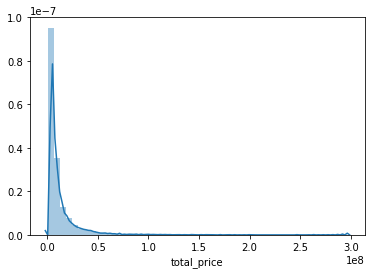

In [68]:
#價錢的分佈
#價錢的分佈
sns.distplot(train[(train['total_price']<300000000)].total_price )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


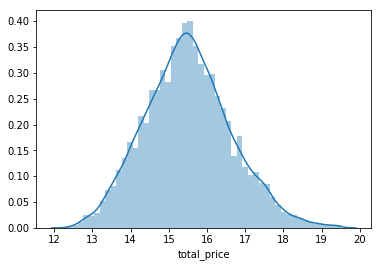

In [69]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
sns.distplot(np.log(train[(train['total_price']<300000000)].total_price))

In [70]:
train = train.drop( labels = train[  (train['total_price']>300000000) ].index, axis = 0 )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


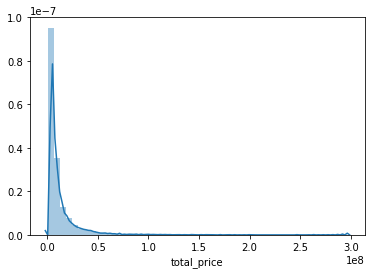

In [71]:
#價錢的分佈
sns.distplot(train.total_price)

In [72]:
train.shape

(59847, 235)

Text(0,0.5,'total_price')

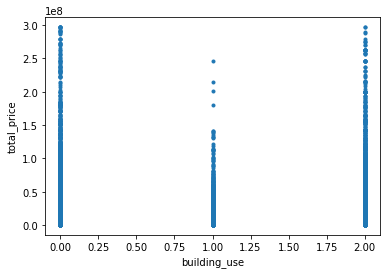

In [73]:
#價錢的分佈
#building_complete_dt>=1600
#parking_price >800000
#building_area>800
#parking_area>800
#land_area >=3000
#town_population remove
#village_income_median remove
#town_area remove

plt.plot(train.parking_way, train.total_price, '.' )
plt.xlabel('building_use')
plt.ylabel('total_price')
#print( df_train[ df_train.XIV_5000 > 4000 ].total_price ) #中刮號放條件

7814     3698.578703
10670    5533.304995
11170    1348.177475
13332    2610.666519
14007    2039.700590
16838    1247.345561
23399    1006.214497
29570    1071.162596
36482    1420.064267
37526    1106.832494
44123    1213.194703
59506    1213.194703
Name: land_area, dtype: float64


(59835, 235)

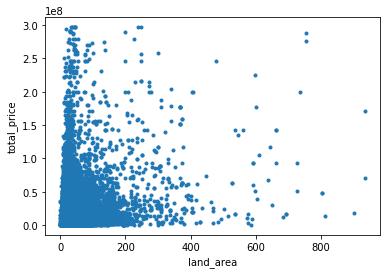

In [74]:
print( train[(train['land_area']>1000) ].land_area )
#太過於分散了，要drop欄位
train = train.drop( labels = train[  (train['land_area']>1000) ].index, axis = 0 )
#sns.distplot(train.land_area)
plt.plot(train.land_area, train.total_price, '.' )
plt.xlabel('land_area')
plt.ylabel('total_price')
train.shape

1351     3.269609e+05
8795     9.702438e+05
51731    3.837894e+05
55472    1.020404e+06
Name: parking_price, dtype: float64


(59831, 235)

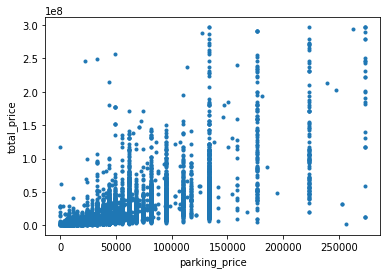

In [75]:
#train['parking_price'] = train['parking_price'].fillna(train['parking_price'].mode()[0])

print( train[(train['parking_price']>300000) ].parking_price )
#df_all['parking_price'] = df_all['parking_price'].apply(int)
train = train.drop( labels = train[  (train['parking_price']>300000) ].index, axis = 0 )
#sns.distplot(train.parking_price)
plt.plot(train.parking_price, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')
train.shape

4339      90.209853
5264      47.384670
7478      40.432080
30232     61.822600
32015     41.413400
34198     44.381528
38617    967.370868
38992     83.497319
43976     40.432080
45886     40.432080
47253     84.609760
48351     40.432080
57996     40.432080
Name: parking_area, dtype: float64


(59818, 235)

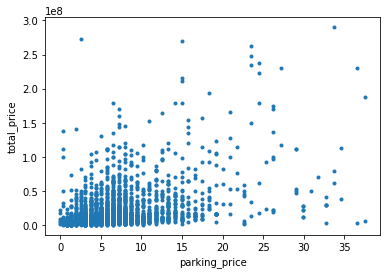

In [76]:
#train['parking_area'] = train['parking_area'].fillna(0)#train['parking_area'].mode()[0])
print( train[(train['parking_area']>40) ].parking_area )
train = train.drop( labels = train[  (train['parking_area']>40) ].index, axis = 0 )
#sns.distplot(train.parking_area)
plt.plot(train.parking_area, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')
train.shape

18493    384.889444
18748    566.505953
21231    693.750804
23605    913.610349
26014    693.750804
26767    589.808827
29104    913.610349
35075    320.288104
43567    384.889444
44963    718.903165
50098    320.288104
51410    416.941144
52777    384.889444
54632    348.585199
57691    418.845282
Name: building_area, dtype: float64


Text(0,0.5,'total_price')

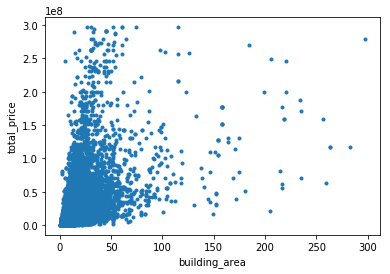

In [77]:
#train['building_area'] = train['building_area'].fillna(train['building_area'].mode()[0])

print( train[(train['building_area']>300) ].building_area )
train = train.drop( labels = train[  (train['building_area']>300) ].index, axis = 0 )
#sns.distplot(train.building_area)
plt.plot(train.building_area, train.total_price, '.' )
plt.xlabel('building_area')
plt.ylabel('total_price')

In [78]:
train.shape

(59803, 235)

In [79]:
#train = train.drop([ 'parking_area'], axis=1, inplace=True)

In [80]:
#取得數值型態的欄位
#取得數值型態欄位
numeric_data = train._get_numeric_data()
numeric_data.columns

Index(['building_material', 'city', 'txn_dt', 'total_floor', 'building_type',
       'building_use', 'building_complete_dt', 'parking_way', 'parking_area',
       'parking_price',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=234)

## sketch pics


In [81]:
# drop掉每個欄位的NA值並劃出其分布
#for i in numeric_data:
#    temp = train[i].dropna()
#    print(f"there are {train[i].shape[0] - temp.shape[0]} NaN in {i}")
#    sns.distplot(temp) 
    #plt.show()

## Drop Null Feature(s)

In [82]:
#df_all = pd.concat( [ train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
#                      test.drop( [ 'Id' ], axis = 1 ) ],
#                      axis = 0, ignore_index = False )
df_all = pd.concat([train.drop('total_price', axis=1), test], keys=['train', 'test'])
trainID=df_all['building_id']
trainPrice=train['total_price']
df_all.drop(['building_id'], axis=1, inplace=True)

In [83]:
trainID.shape

(69803,)

In [84]:
# check null status
#print( df_all.shape )
#df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
#print( df_na[ df_na > 100 ].sort_values(ascending=False) )

In [85]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['parking_area'], axis = 1) # for 486 null values (train + test)
#print( df_all.shape )

In [86]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['land_area'], axis = 1) #
print(df_all.shape)

(69803, 233)


In [87]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['parking_way'], axis = 1) #
#print(df_all.shape)

In [88]:
import math
def QualToZero2(x):
    #if(math.isnan(x)):
    #    return 0
    if(x==0):
        return 1
    if(x==1):
        return 2
    if(x==2):
        return 0
    return x

df_all['parking_way'] = df_all['parking_way'].apply(QualToZero2)

In [89]:

#df_all['parking_area'] = df_all['parking_area'].fillna(0)
#df_all['parking_price'] = df_all['parking_price'].fillna(0)

In [90]:
df_all.head()

building_material  city  txn_dt  total_floor  building_type  \
train 0                  8    21   18674            4              3   
      1                  8     7   18800            5              1   
      2                  8     7   19289            4              1   
      3                  8    21   20385           24              0   
      4                  1    21   20657            2              4   

         building_use  building_complete_dt  parking_way  parking_area  \
train 0             2                  6271            0           NaN   
      1             2                  7885            0           NaN   
      2             2                  6028            0           NaN   
      3             2                 18325            1           NaN   
      4             2                  6880            0           NaN   

         parking_price     ...      XIV_250  XIV_500  XIV_index_500  XIV_1000  \
train 0            NaN     ...           21       58              1       157   
      1            NaN     ...            7       28              1       115   
      2            NaN     ...           27       78              1       212   
      3   81138.889762     ...            2       20              1       125   
      4            NaN     ...            2       18              1        47   

         XIV_index_1000  XIV_5000  XIV_index_5000  XIV_10000  XIV_index_10000  \
train 0               1      2483               1       6011                1   
      1               1     15872               1      32221                1   
      2               1     15760               1      32228                1   
      3               1      2568               1       7271                1   
      4               1      2587               1       7442                1   

            XIV_MIN  
train 0   34.469803  
      1   40.073573  
      2   54.462081  
      3   99.628966  
      4  124.131236  

[5 rows x 233 columns]

In [91]:
#df_all["parking_area"] = df_all[(df_all['parking_way']==0)]["parking_area"].fillna(0)#df_all['parking_area'].mode()[0])
df_all=df_all.reset_index()
means = df_all.groupby(['parking_way','building_material','building_type','building_use'])['parking_area'].mean()
means=means.fillna(0)
means
df_all = df_all.set_index(['parking_way','building_material','building_type','building_use'])
df_all['parking_area'] = df_all['parking_area'].fillna(means)

df_all.head()

level_0  level_1  \
parking_way building_material building_type building_use                    
0           8                 3             2              train        0   
                              1             2              train        1   
                                            2              train        2   
1           8                 0             2              train        3   
0           1                 4             2              train        4   

                                                          city  txn_dt  \
parking_way building_material building_type building_use                 
0           8                 3             2               21   18674   
                              1             2                7   18800   
                                            2                7   19289   
1           8                 0             2               21   20385   
0           1                 4             2               21   20657   

                                                          total_floor  \
parking_way building_material building_type building_use                
0           8                 3             2                       4   
                              1             2                       5   
                                            2                       4   
1           8                 0             2                      24   
0           1                 4             2                       2   

                                                          building_complete_dt  \
parking_way building_material building_type building_use                         
0           8                 3             2                             6271   
                              1             2                             7885   
                                            2                             6028   
1           8                 0             2                            18325   
0           1                 4             2                             6880   

                                                          parking_area  \
parking_way building_material building_type building_use                 
0           8                 3             2                 0.000000   
                              1             2                 0.000000   
                                            2                 0.000000   
1           8                 0             2                 7.256586   
0           1                 4             2                 0.000000   

                                                          parking_price  \
parking_way building_material building_type building_use                  
0           8                 3             2                       NaN   
                              1             2                       NaN   
                                            2                       NaN   
1           8                 0             2              81138.889762   
0           1                 4             2                       NaN   

                                                          txn_floor  \
parking_way building_material building_type building_use              
0           8                 3             2                   3.0   
                              1             2                   5.0   
                                            2                   1.0   
1           8                 0             2                  13.0   
0           1                 4             2                   NaN   

                                                          land_area  \
parking_way building_material building_type building_use              
0           8                 3             2             18.144460   
                              1             2             11.387227   
                                            2             21.426802   
1           8

In [92]:
df_all=df_all.reset_index()
means = df_all.groupby(['parking_way','building_material','building_type','total_floor'])['parking_price'].mean()
means=means.fillna(0)
means
df_all = df_all.set_index(['parking_way','building_material','building_type','total_floor'])
df_all['parking_price'] = df_all['parking_price'].fillna(means)
df_all=df_all.reset_index()
df_all.head()

,parking_way,building_material,building_type,total_floor,building_use,level_0,level_1,city,txn_dt,building_complete_dt,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,0,8,3,4,2,train,0,21,18674,6271,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,0,8,1,5,2,train,1,7,18800,7885,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,0,8,1,4,2,train,2,7,19289,6028,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,1,8,0,24,2,train,3,21,20385,18325,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,0,1,4,2,2,train,4,21,20657,6880,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [93]:
df_all=df_all.reset_index()
means = df_all.groupby(['building_material','building_type','building_use'])['txn_floor'].median()
means=means.fillna(0)
means
df_all = df_all.set_index(['building_material','building_type','building_use'])
df_all['txn_floor'] = df_all['txn_floor'].fillna(means)
df_all=df_all.reset_index()
df_all.head()

,building_material,building_type,building_use,index,parking_way,total_floor,level_0,level_1,city,txn_dt,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,8,3,2,0,0,4,train,0,21,18674,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,8,1,2,1,0,5,train,1,7,18800,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,8,1,2,2,0,4,train,2,7,19289,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,8,0,2,3,1,24,train,3,21,20385,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,1,4,2,4,0,2,train,4,21,20657,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [94]:
#df_all=df_all.reset_index()
means = df_all.groupby(['city','town','building_material'])['village_income_median'].median()
#means
means=means.fillna(0)
df_all = df_all.set_index(['city','town','building_material'])
df_all['village_income_median'] = df_all['village_income_median'].fillna(means)
df_all=df_all.reset_index()
df_all.head()

,city,town,building_material,building_type,building_use,index,parking_way,total_floor,level_0,level_1,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,21,334,8,3,2,0,0,4,train,0,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,7,180,8,1,2,1,0,5,train,1,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,7,180,8,1,2,2,0,4,train,2,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,21,343,8,0,2,3,1,24,train,3,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,21,102,1,4,2,4,0,2,train,4,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [95]:
#df_all["parking_area"] = df_all[(df_all['building_area'].isna()) ].fillna(df_all['parking_area'].median()[0])
#means = df_all.groupby(['parking_way'])['parking_area'].mean()
#df_all["parking_area"]  = df_all.groupby("parking_way")["parking_area"].transform(lambda x: x.fillna(x.mean()))
#means = df_all.groupby(['parking_way'])['parking_price'].mean()
#df_all['parking_price'] = df_all[(df_all['parking_way']==0)]['parking_price'].fillna(0)
#df_all["parking_price"]  = df_all.groupby("parking_way")["parking_price"].transform(lambda x: x.fillna(x.median()))
#df_all["parking_area"] = df_all[(df_all['parking_way']==0)]["parking_area"].fillna(0)#df_all['parking_area'].mode()[0])
#df_all["parking_area"] = df_all[(df_all['parking_way']==1)]["parking_area"].transform(lambda x: x.fillna(x.median()))#.fillna(df_all[(df_all['parking_way']==1)]['parking_area'].median())
#df_all["parking_area"] = df_all[(df_all['parking_way']==2)]["parking_area"].transform(lambda x: x.fillna(x.median()))



#df_all['parking_price'] = df_all[(df_all['parking_way']==0)]['parking_price'].fillna(0)
#df_all['parking_price'] = df_all[(df_all['parking_way']==1)]['parking_price'].transform(lambda x: x.fillna(x.median()))
#df_all['parking_price'] = df_all[(df_all['parking_way']==2)]['parking_price'].transform(lambda x: x.fillna(x.median()))

#df_all['building_area'] = df_all['building_area'].fillna(df_all['building_area'].mode()[0])

#df_all['village_income_median'] = df_all.groupby("city")["village_income_median"].transform(lambda x: x.fillna(x.mode()))
#df_all['village_income_median'] = df_all['village_income_median'].fillna(df_all['village_income_median'].mode()[0])
#df_all['txn_floor'] = df_all.groupby("city")["txn_floor"].transform(lambda x: x.fillna(x.mode()))
#
#df_all["parking_price"] = df_all.groupby("city")["parking_price"].transform(lambda x: x.fillna(x.mean()))
#df_all["txn_floor"] = df_all.groupby("city")["txn_floor"].transform(lambda x: x.fillna(x.mode()))
#df_all['txn_floor'] = df_all['txn_floor'].fillna(df_all['txn_floor'].mode()[0])    

#df_all["LotFrontage"] = df_all.groupby("BldgType")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
#df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
#df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

In [96]:
df_all.head()

,city,town,building_material,building_type,building_use,index,parking_way,total_floor,level_0,level_1,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,21,334,8,3,2,0,0,4,train,0,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,7,180,8,1,2,1,0,5,train,1,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,7,180,8,1,2,2,0,4,train,2,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,21,343,8,0,2,3,1,24,train,3,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,21,102,1,4,2,4,0,2,train,4,...,2,18,1,47,1,2587,1,7442,1,124.131236


Text(0,0.5,'total_price')

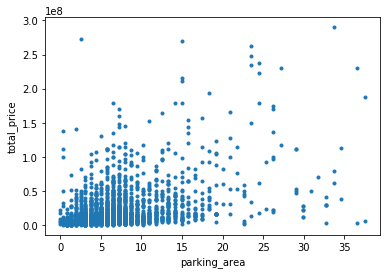

In [97]:
plt.plot(train.parking_area, train.total_price, '.' )
plt.xlabel('parking_area')
plt.ylabel('total_price')

Text(0,0.5,'building_type')

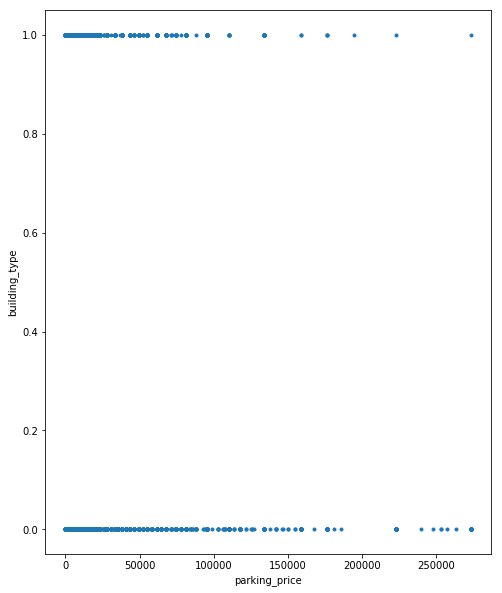

In [159]:
plt.plot(train.parking_price, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('building_type')
#'parking_way','building_material','building_type','total_floor'

Text(0,0.5,'total_price')

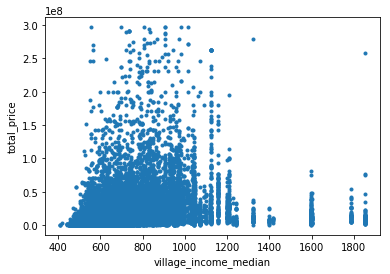

In [99]:
plt.plot(train.village_income_median, train.total_price, '.' )
plt.xlabel('village_income_median')
plt.ylabel('total_price')

Text(0,0.5,'total_price')

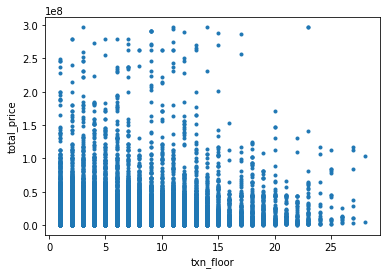

In [100]:
plt.plot(train.txn_floor, train.total_price, '.' )
plt.xlabel('txn_floor')
plt.ylabel('total_price')

In [101]:
# Working with ordinal predictors
def QualToInt(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='missing'):
        r = 4
    else:
        r = 5
    return r

df_all['TotalFloor2'] = df_all['txn_floor']/df_all['total_floor']
df_all['TotalFloor2'].head()

0    0.750000
1    1.000000
2    0.250000
3    0.541667
4    0.000000
Name: TotalFloor2, dtype: float64

Text(0,0.5,'total_price')

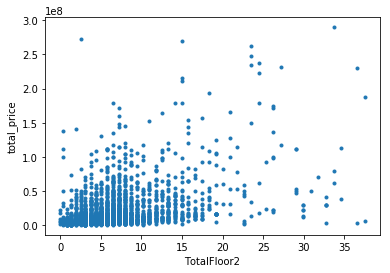

In [102]:
plt.plot(train.parking_area, train.total_price, '.' )
plt.xlabel('TotalFloor2')
plt.ylabel('total_price')

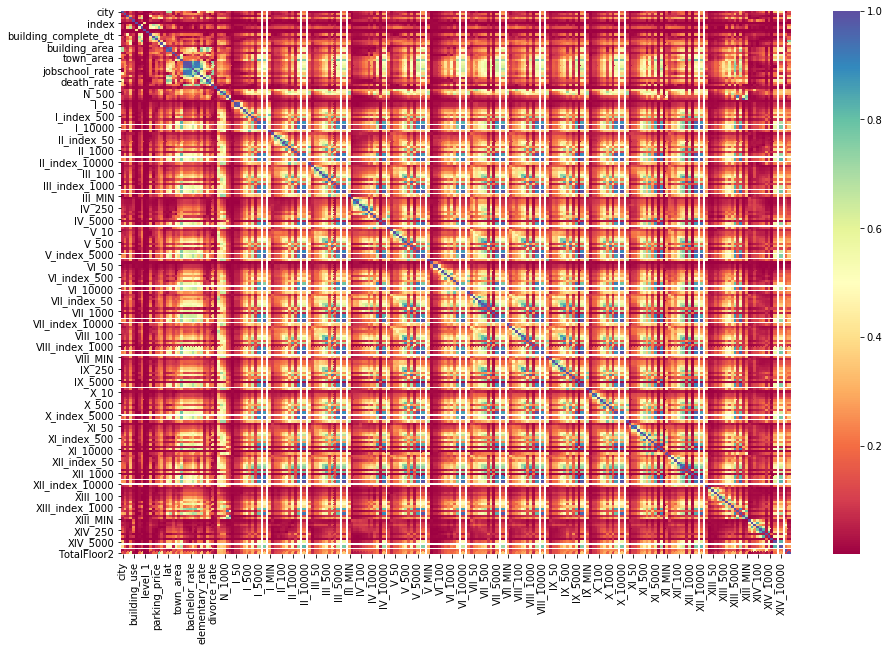

In [103]:
## Numerical to Categorical
# 嘗試不同的顏色"Spectral"：
corr_matrix=df_all.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,cmap='Spectral')

## Numerical to Categorical

In [104]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
#train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

In [105]:
# It helps to transform some numerical features to categorical
#df_all.YearBuilt = df_all.YearBuilt.astype ( str )

In [106]:
# handle skewness
train.total_price = np.log( train.total_price )
# exclude object型態的欄位
num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
# apply function>>幫助我們算出偏差系數
skewed_feats = df_all[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
print(skewed_feats)
# 選出dataframe大於0.75的人
skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
# 把大於0.75的要作正規化，變成常態分配
# np.log1p是log(1+x), 若直接取log會有log0的問題
df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )



city                         0.722985
town                         0.296283
building_material           -2.506124
building_type                0.116337
building_use                 3.594980
index                        0.000000
parking_way                  1.833060
total_floor                  1.104158
level_1                      0.214938
txn_dt                      -0.158829
building_complete_dt        -0.029036
parking_area                 3.008212
parking_price                3.513323
txn_floor                    1.353443
land_area                    9.353472
building_area              120.268834
lat                         -1.215566
lon                         -0.760107
village_income_median        2.703826
town_population              0.644876
town_area                    1.987735
town_population_density      0.769879
doc_rate                     1.502881
master_rate                  1.442493
bachelor_rate                1.227539
jobschool_rate              -0.015703
highschool_r

In [107]:
#df_all.describe(include = "O")
df_all.corr()

,city,town,building_material,building_type,building_use,index,parking_way,total_floor,level_1,txn_dt,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,TotalFloor2
city,1.000000,0.067713,-0.012749,0.148824,-0.056795,-0.002432,-0.065163,-0.066136,-2.251842e-03,-0.003202,...,-0.150634,0.013066,-0.191993,0.009089,-0.233299,NaN,-0.409979,NaN,0.040004,-1.387279e-01
town,0.067713,1.000000,-0.033264,0.085445,-0.048979,-0.003940,0.009825,-0.032347,-3.414230e-03,-0.014723,...,-0.118010,-0.028555,-0.114883,-0.006284,-0.113124,NaN,-0.153045,NaN,0.071430,-9.454958e-02
building_material,-0.012749,-0.033264,1.000000,-0.271620,0.106568,-0.001595,0.191245,0.480848,-2.244084e-03,0.001174,...,-0.033511,-0.013696,-0.001072,-0.004048,0.022663,NaN,0.036489,NaN,0.048802,2.427005e-01
building_type,0.148824,0.085445,-0.271620,1.000000,-0.106343,-0.002347,-0.321521,-0.690411,-3.459086e-03,0.000773,...,-0.099070,-0.038815,-0.129832,-0.011055,-0.230662,NaN,-0.281247,NaN,0.031966,-5.650602e-01
building_use,-0.056795,-0.048979,0.106568,-0.106343,1.000000,0.005190,0.053062,0.148001,-2.609638e-03,-0.002578,...,0.095524,0.005390,0.073780,0.002005,0.061288,NaN,0.090463,NaN,-0.112172,5.880453e-02
index,-0.002432,-0.003940,-0.001595,-0.002347,0.005190,1.000000,0.000522,0.003064,4.075046e-01,0.000851,...,-0.003508,-0.004293,-0.004025,-0.004658,-0.001764,NaN,-0.001410,NaN,0.003521,2.892764e-03
parking_way,-0.065163,0.009825,0.191245,-0.321521,0.053062,0.000522,1.000000,0.516289,3.684104e-03,0.004343,...,-0.050852,0.004501,-0.021208,0.006372,0.028870,NaN,0.040934,NaN,0.065336,2.112499e-01
total_floor,-0.066136,-0.032347,0.480848,-0.690411,0.148001,0.003064,0.516289,1.000000,4.566779e-03,-0.015929,...,0.013324,0.032987,0.058466,0.013395,0.136084,NaN,0.154334,NaN,0.009410,4.318040e-01
level_1,-0.002252,-0.003414,-0.002244,-0.003459,-0.002610,0.407505,0.003684,0.004567,1.000000e+00,0.000409,...,-0.001823,-0.001744,-0.001750,-0.002916,0.003955,NaN,0.004766,NaN,0.002593,4.261716e-07
txn_dt,-0.003202,-0.014723,0.001174,0.000773,-0.002578,0.000851,0.004343,-0.015929,4.090396e-04,1.000000,...,0.016949,0.001931,0.011487,0.002862,0.008011,NaN,0.012654,NaN,-0.015291,-3.870500e-03


## One-Hot Encoding

In [108]:
df_all_dum = pd.get_dummies(df_all); 
df_all_dum.head()

,city,town,building_material,building_type,building_use,index,parking_way,total_floor,level_1,txn_dt,...,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,TotalFloor2,level_0_test,level_0_train
0,21,334,8,3,1.098612,0,0.000000,1.609438,0,18674,...,5.062595,1,7.817625,1,6011,1,3.568682,0.750000,0,1
1,7,180,8,1,1.098612,1,0.000000,1.791759,1,18800,...,4.753590,1,9.672375,1,32221,1,3.715365,1.000000,0,1
2,7,180,8,1,1.098612,2,0.000000,1.609438,2,19289,...,5.361292,1,9.665294,1,32228,1,4.015700,0.250000,0,1
3,21,343,8,0,1.098612,3,0.693147,3.218876,3,20385,...,4.836282,1,7.851272,1,7271,1,4.611440,0.541667,0,1
4,21,102,1,4,1.098612,4,0.000000,1.098612,4,20657,...,3.871201,1,7.858641,1,7442,1,4.829363,0.000000,0,1


In [109]:
# 將NA的值填平均值
#df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

In [110]:
df_all.shape

(69803, 237)

In [111]:
#from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(df_all[c].values)) 
#    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (69803, 237)


In [112]:
np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

[]

In [113]:
## Standardization

## Standardization

In [114]:
# normalization helps a bit
from sklearn import preprocessing

#num_feats = df_all_dum.select_dtypes( exclude = [ 'object' ] ).columns
df_all_dum[ num_feats ] = preprocessing.scale( df_all_dum[ num_feats ] )
df_all_dum[ num_feats ].head()

,city,town,building_material,building_type,building_use,index,parking_way,total_floor,level_1,txn_dt,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,TotalFloor2
0,2.015204,1.976945,0.338170,0.671797,-0.167508,-1.732026,-0.532367,-0.690519,-1.443577,-1.120926,...,0.468256,0.065589,-0.009957,0.01197,-0.622651,0.0,-1.160651,0.0,-0.868501,0.866939
1,-0.927499,0.400016,0.338170,-0.587155,-0.167508,-1.731976,-0.532367,-0.365128,-1.443523,-0.947757,...,-0.253386,0.065589,-0.338507,0.01197,1.773480,0.0,1.753053,0.0,-0.700229,1.563737
2,-0.927499,0.400016,0.338170,-0.587155,-0.167508,-1.731927,-0.532367,-0.690519,-1.443468,-0.275695,...,0.764851,0.065589,0.307634,0.01197,1.764332,0.0,1.753832,0.0,-0.355692,-0.526657
3,2.015204,2.069103,0.338170,-1.216631,-0.167508,-1.731877,1.514139,2.181857,-1.443413,1.230605,...,-0.581340,0.065589,-0.250585,0.01197,-0.579183,0.0,-1.020580,0.0,0.327728,0.286274
4,2.015204,-0.398689,-2.885022,1.301273,-0.167508,-1.731827,-0.532367,-1.602193,-1.443359,1.604431,...,-0.683029,0.065589,-1.276708,0.01197,-0.569664,0.0,-1.001570,0.0,0.577724,-1.223455


In [115]:
np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

[]

In [116]:
# 查詢是否有重複的欄位
df_all_dum.columns[df_all_dum.columns.duplicated()]

Index([], dtype='object')

## Training Start

In [117]:
# inputs
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
X = df_all_dum[:train.shape[0]]
y = train.total_price
#把train data與test分開
X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)

X_test = df_all_dum[ train.shape[0]: ]

In [118]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [119]:
def error(yhat,y_pred):
    error_sum = ((yhat - y_pred)/y_pred*100)
    mask = (error_sum>10).sum()+(error_sum<-10).sum()
    print(mask)
    return error_sum

In [120]:
#y_answer_pred = y_pred_rf# * 0.5 + y_pred * 0.5
#print(error(np.array(np.exp(y)),np.exp(y_answer_pred)))

## XGBoost

In [121]:
import xgboost as xgb
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [122]:
#https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression
#model_XGB = XGBRegressor(colsample_bytree=0.4,
#                 gamma=0,                 
#                 learning_rate=0.07,
#                 max_depth=3,
#                 min_child_weight=1.5,
#                 n_estimators=10000,                                                                    
#                 reg_alpha=0.75,
#                 reg_lambda=0.45,
#                 subsample=0.6,
#                 seed=42) 

#model_XGB = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=5, 
#                             min_child_weight=1.7817, n_estimators=4000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
                             learning_rate=0.05, max_depth=7, 
                             min_child_weight=1.7817, n_estimators=4000,objective='reg:linear',
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

val_preds = model_XGB.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.07148831668614358
  R2: 0.9960623346333087
RMSE: 0.2030944628030995
  R2: 0.9681957186083062


In [123]:
import pickle
#save model
pickle.dump(model_XGB, open("./savemodel/xgb_0523_median.dat", "wb"))

In [124]:
np.exp(y_pred)

array([ 5589017. , 70453740. ,  4914856. , ...,  2621509. ,  6268972.5,
        6388929.5], dtype=float32)

In [125]:
np.array(np.exp(y))

array([ 5328714.65890591, 76276179.91749465,  4553334.27287215, ...,
        2636755.25984292,  7001229.73332825,  6730861.37805399])

In [126]:
pd.DataFrame({'total_price': np.exp(y_pred)}).to_csv('submission_y_xgb_0523_median_2.csv')

In [127]:
#pd.DataFrame({'total_price': np.array(np.exp(y))}).to_csv('submission_y_2.csv')

In [128]:
print(error(np.array(np.exp(y)),np.exp(y_pred)))

7374
[-4.6573904   8.2641966  -7.35569317 ...  0.58158335 11.68065793
  5.3519432 ]


In [129]:
y.shape

(53822,)

In [130]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())
pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0523_median.csv')

                  total_price
building_id                  
X5gsdTWGS3W7JJQB   11942206.0
BTshNOJyKHnT2YIT    4194564.0
dhdymr0lV8N5kZOT   10326862.0
VEwyGGMcD56w5BOc    6100279.0
wmUeMoJZfsqaSX9b     954094.0


In [131]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())

                  total_price
building_id                  
X5gsdTWGS3W7JJQB   11942206.0
BTshNOJyKHnT2YIT    4194564.0
dhdymr0lV8N5kZOT   10326862.0
VEwyGGMcD56w5BOc    6100279.0
wmUeMoJZfsqaSX9b     954094.0


In [132]:
pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0523_4000.csv')

In [175]:
#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=3, 
#                             min_child_weight=1, n_estimators=10000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#https://github.com/Cuongvn08/tensorflow_kaggle_house_price/blob/master/train.py
#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1)
#import lightgbm as lgb
#model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=6, 
#                             min_child_weight=5, n_estimators=4000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=7, 
#                             min_child_weight=4, n_estimators=5000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
#colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=7, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1


#colsample_bylevel=1,colsample_bytree=1, gamma=0, 
#                             learning_rate=0.1, max_delta_step=0,max_depth=7, 
#                             min_child_weight=1,missing=None, n_estimators=2200,nthread=-1,objective='reg:linear',
#                             reg_alpha=0, reg_lambda=1,scale_pos_weight=1,seed=1850,
#                              silent=True,subsample=1,
#                             random_state =7
#model_XGB = XGBRegressor()
#model_XGB.fit(X, y)
#y_pred = model_XGB.predict( X )
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
#print('  R2:', metrics.r2_score(y, y_pred))

In [176]:
#val_preds = model_XGB.predict(X_val)

#print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_val, val_preds ) )


In [177]:
#y_answer_XGB = model_XGB.predict( X_test )
#y_answer_XGB = np.exp(y_answer_XGB)
#print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())

In [178]:
#pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0513_2200.csv')

In [179]:
#import pickle
#save model
#pickle.dump(model_XGB, open("./savemodel/submission_xgb_0513_2200.dat", "wb"))

In [149]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [  0.00005],normalize=True, max_iter=1e5).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

[0.3707786  0.38194558 0.37548786 0.37005115 0.37039249] 5e-05


In [150]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

48 190


Text(0.5,1,'Coefficients in Model Lasso')

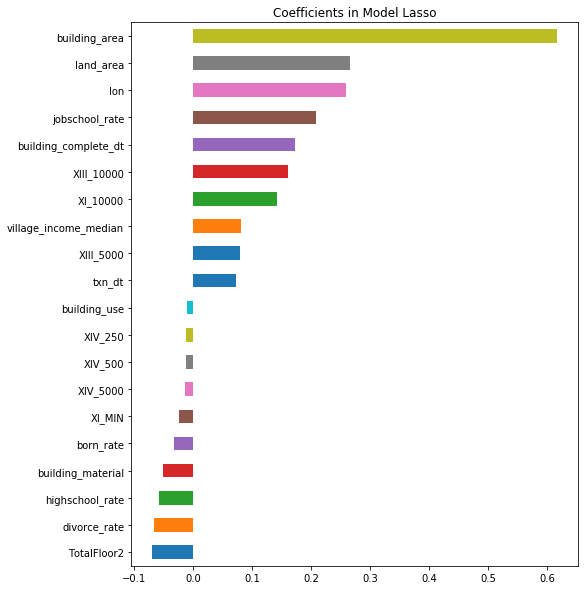

In [151]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [152]:

preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

RMSE: 0.37481460026905816
  R2: 0.8917565406541514


In [153]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.38143732322297363
  R2: 0.887814741362211


In [148]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).head())

                   total_price
building_id                   
X5gsdTWGS3W7JJQB  5.406889e+06
BTshNOJyKHnT2YIT  5.406889e+06
dhdymr0lV8N5kZOT  5.406889e+06
VEwyGGMcD56w5BOc  5.406889e+06
wmUeMoJZfsqaSX9b  5.406889e+06


In [139]:
pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).to_csv('submission_0523_Lasso.csv')

In [140]:
import pickle
#save model
pickle.dump(model_Lasso, open("./savemodel/submission_0523_Lasso.dat", "wb"))

In [141]:
y_answer_pred = preds * 0.5 + y_pred * 0.5
print(error(np.array(np.exp(y)),np.exp(y_answer_pred)))

36715
[  2.23918213  43.67175225  -1.05039154 ... -12.38049813  19.72446746
  23.89649132]


In [142]:
y.shape

(53822,)

In [542]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.5 + y_answer_XGB * 0.5
print(pd.DataFrame({'total_price': y_answer}, index=test.building_id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'total_price': y_answer}, index=test.building_id).to_csv('submission_0514_LX.csv')

                   total_price
building_id                   
X5gsdTWGS3W7JJQB  8.831089e+06
BTshNOJyKHnT2YIT  3.753854e+06
dhdymr0lV8N5kZOT  8.702886e+06
VEwyGGMcD56w5BOc  6.010912e+06
wmUeMoJZfsqaSX9b  1.079262e+06
RMSE: 0.35204820634240597
  R2: 0.8985208453599165


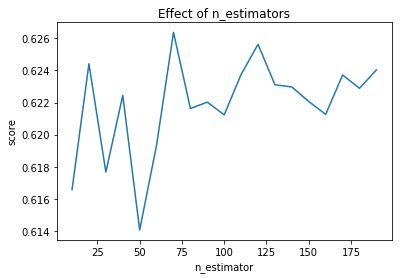

In [740]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 12,max_depth = 3,n_jobs = -1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_rf.set_params(n_estimators=n)
    model_rf.fit(X, y)
    scores.append(model_rf.score(X, y))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [747]:
model_rf.fit(X,y)
y_pred_rf = model_rf.predict(X)
score_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
print("RandomForest Score :",score_rf)

#y_pred_rf_test = model_rf.predict(test_new)
#y_pred_rf_test = np.exp(y_pred_rf_test)

RandomForest Score : 0.673386407577646


In [748]:
y_pred_rf.shape

(53320,)

In [ ]:
#LassoCV

In [ ]:

kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    model_XGB = XGBRegressor()
#    model_XGB = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=5, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
    model_XGB.fit(X_train, y_train)
    y_pred = model_XGB.predict(X_val)
    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_XGB = pred_tmp/5

## Decision Tree

In [ ]:
#https://www.itread01.com/content/1545151168.html

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
#parameters={'colsample_bytree':[0.4603], 'gamma':[0.0468], 
#                             'learning_rate':[0.1,0.05,0.01], 'max_depth':[6,7,8], 
#                             'min_child_weight':[4], 'n_estimators':[2200],
#                             'reg_alpha':[0.4640], 'reg_lambda':[0.8571],
#                             'subsample:':[0.5213], 'silent':[1],
#                             'random_state' :[7], 'nthread' : [-1]}

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#xgb_grid = GridSearchCV(xgb1,
#                        parameters,
#                        cv = 2,
#                        n_jobs = 5,
#                        verbose=True)

#xgb_grid.fit(X,y)

#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

In [ ]:
#val_preds = xgb_grid.predict(X_val)

#print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
#y_answer_XGB = xgb_grid.predict( X_test )
#y_answer_XGB = np.exp(y_answer_XGB)
#print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).head())

In [ ]:
#pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).to_csv('submission_xgb.csv')

## SVR

In [ ]:
# KFold Data Split

from sklearn.svm import SVR
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
for train_index, val_index in kf.split(X):
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['total_price'], index = val_index)
    print(train_index)
    model_SVR = SVR(kernel='rbf', gamma=0.002)
    model_SVR.fit(X_train, y_train)
    print('predict')
    y_pred = model_SVR.predict(X_val)
    y_ans = model_SVR.predict(X_test)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_SVR = pred_tmp/5

In [ ]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_SVR}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_SVR}, index=test.building_id).to_csv('submission_SVR.csv')

## LassoCV

In [ ]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

In [ ]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

In [ ]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [ ]:

preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

In [ ]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).to_csv('submission_Lasso_drop.csv')

In [179]:
y_pred = model_SVR.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.10138901729916881
  R2: 0.934380883634592


In [180]:
val_preds = model_SVR.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [181]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).head())

          SalePrice
Id                 
1461  119564.485424
1462  156653.579860
1463  171243.151646
1464  190406.991972
1465  193886.623344


In [182]:
pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).to_csv('submission_SVR.csv')

In [185]:
#RandomForestClassifier 效果不好
clf = RandomForestClassifier()
clf.fit(X, y.astype('int'))
y_pred = clf.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.6077254179680507
  R2: -1.357563246168168


In [186]:
val_preds = clf.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.6026382665096865
  R2: -1.2309892387712504


In [187]:

y_answer_rm = clf.predict( X_test )
y_answer_rm = np.exp(y_answer_rm)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_rm}, index=test.Id).head())

          SalePrice
Id                 
1461   59874.141715
1462   59874.141715
1463  162754.791419
1464  162754.791419
1465  162754.791419


## Blending

In [96]:
# Lasso + SVR
y_answer = y_answer_Lasso * 0.75 + y_answer_SVR * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LS_Best.csv')

          SalePrice
Id                 
1461  116306.877254
1462  156581.025459
1463  176170.412685
1464  191485.161847
1465  195519.510106
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [97]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.75 + y_answer_XGB * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LX.csv')

          SalePrice
Id                 
1461  116870.775429
1462  158092.478150
1463  177635.847430
1464  190654.937292
1465  196155.229270
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [98]:
# Lasso + SVR + XGB
y_answer = y_answer_Lasso * 0.72 + y_answer_SVR * 0.04 + y_answer_XGB * 0.24
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_answer, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX.csv')

          SalePrice
Id                 
1461  116978.523439
1462  158034.920031
1463  177380.137723
1464  190645.017135
1465  196064.483158
RMSE: 0.11178810224904052


In [99]:
# Lasso + SVR + XGB -2
y_answer = (y_answer_Lasso + y_answer_SVR + y_answer_XGB) /3
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX3.csv')

          SalePrice
Id                 
1461  118868.523805
1462  158636.603715
1463  175386.958434
1464  189779.212509
1465  195459.976346


In [100]:
# SVR + XGB
y_answer = y_answer_SVR * 0.3 + y_answer_XGB * 0.7
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_SX.csv')

          SalePrice
Id                 
1461  121143.400315
1462  160885.644271
1463  175346.367369
1464  188082.363217
1465  195666.627628
